In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn import datasets
from matplotlib import pyplot 
from pandas.plotting import scatter_matrix 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns 
import os 

print("libraries imported")

libraries imported


In [7]:
df_store = pd.read_excel(r"C:\Users\Pranav\Downloads\Sample - Superstore.xls")
print("Data read successfully")

Data read successfully


In [9]:
df_store.shape



(9994, 21)

In [11]:
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
df_store.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [13]:
df_store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df_store["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
df_store["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [17]:
df_store=df_store.drop(columns=["Postal Code"],axis=1)

In [18]:
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [19]:
df_store.shape

(9994, 20)

In [23]:
df_store["Category"].value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [25]:
df_store["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [26]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df_store)
display(summary_df)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Row ID,int64,0,9994,9994,"{1: 1, 6666: 1, 6659: 1, 6660: 1, 6661: 1, 666..."
1,Order ID,object,0,9994,5009,"{'CA-2017-100111': 14, 'CA-2017-157987': 12, '..."
2,Order Date,datetime64[ns],0,9994,1237,"{2016-09-05 00:00:00: 38, 2017-09-02 00:00:00:..."
3,Ship Date,datetime64[ns],0,9994,1334,"{2015-12-16 00:00:00: 35, 2017-09-26 00:00:00:..."
4,Ship Mode,object,0,9994,4,"{'Standard Class': 5968, 'Second Class': 1945,..."
5,Customer ID,object,0,9994,793,"{'WB-21850': 37, 'JL-15835': 34, 'MA-17560': 3..."
6,Customer Name,object,0,9994,793,"{'William Brown': 37, 'John Lee': 34, 'Matt Ab..."
7,Segment,object,0,9994,3,"{'Consumer': 5191, 'Corporate': 3020, 'Home Of..."
8,Country,object,0,9994,1,{'United States': 9994}
9,City,object,0,9994,531,"{'New York City': 915, 'Los Angeles': 747, 'Ph..."


In [27]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df_store.head())
print(df_store.describe())
print(df_store.duplicated().sum())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country             City       State Region       Product ID         Category Sub-Category                                       Product Name     Sales  Quantity  Discount    Profit
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky  South  FUR-BO-10001798        Furniture    Bookcases                  Bush Somerset Collection Bookcase  261.9600         2      0.00   41.9136
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky  South  FUR-CH-10000454        Furniture       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3      0.00  219.5820
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045  Darrin Van Huff  Corporate  United States   

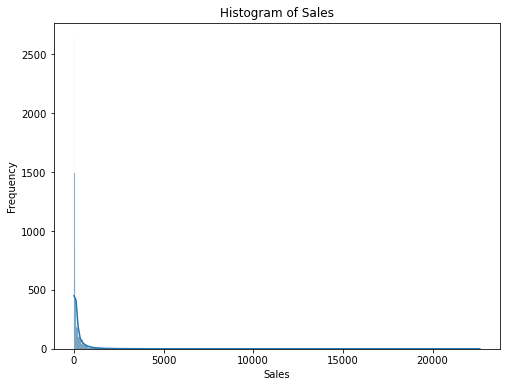

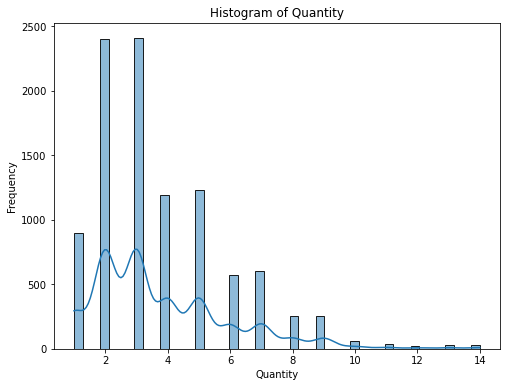

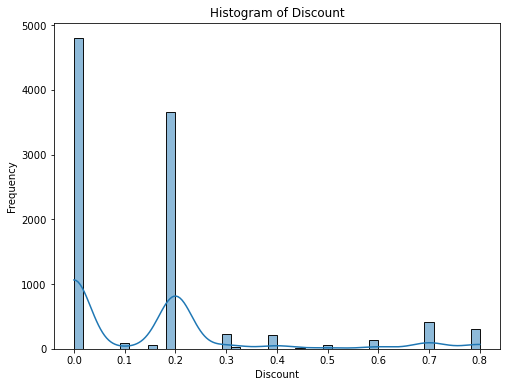

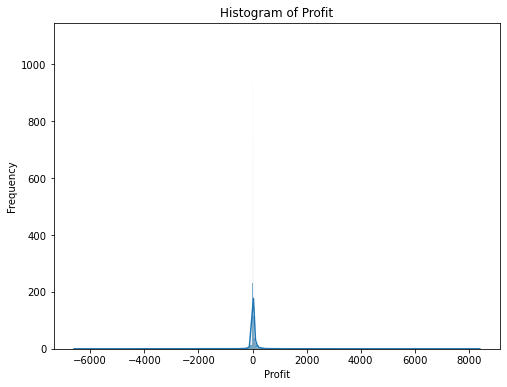

In [30]:
# Identify numerical columns
numerical_columns = df_store.select_dtypes(include=[np.number]).columns

exclude_columns = ['Row ID']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(df_store[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(df_store[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()

In [39]:
df_store.duplicated().sum()

0

<AxesSubplot:>

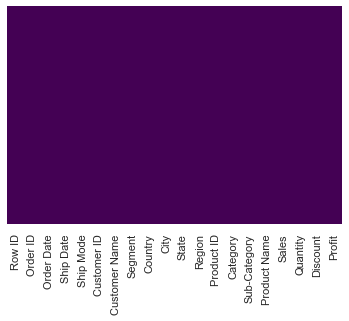

In [41]:
sns.heatmap(df_store.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
df_without_row_id = df_store.drop(columns=['Row ID'])

# Calculate the correlation matrix
correlation_matrix = df_without_row_id.corr()

# Display the correlation matrix
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


In [46]:
import numpy as np

# Given correlation coefficient
r = 0.479064
n = 9994  # Sample size obtained from df_store.shape
alpha = 0.05  # Significance level

# Calculate the test statistic
t = r * np.sqrt((n - 2) / (1 - r**2))

# Determine the critical value (two-tailed test)
# Degrees of freedom = n - 2
degrees_of_freedom = n - 2
critical_value = 2.131  # From t-distribution table for alpha=0.05 and df=9992 (approx.)

# Make a decision
if np.abs(t) > critical_value:
    print("Reject the null hypothesis. There is a statistically significant linear relationship between Sales and Profit.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant linear relationship between Sales and Profit.")


Reject the null hypothesis. There is a statistically significant linear relationship between Sales and Profit.


In [47]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        print("Processing variable:", ivars)
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

numerical_cols = ['Sales', 'Quantity','Discount','Profit']
categorical_cols = ['c_edu_encoded', 'c_hse_encoded', 'c_pc', 'c_incm_typ', 'c_occ_encoded',
                    'loan_home_tag', 'loan_auto_tag']
dependent_col = ['c_seg_encoded']
all_cols = numerical_cols + categorical_cols + dependent_col

IVDF, woeDF = iv_woe(df_store[all_cols], 'c_seg_encoded', bins=10, show_woe=True)

sorted_IVDF = IVDF.sort_values(by='IV', ascending=False)
display(sorted_IVDF)

Correlation value between Sales and Quantity is: 0.20079477137389837
Correlation value between Sales and Discount is: -0.028190124157535607
Correlation value between Sales and Profit is: 0.4790643497377063
Correlation value between Quantity and Discount is: 0.008622970271156591
Correlation value between Discount and Profit is: -0.21948745637176897


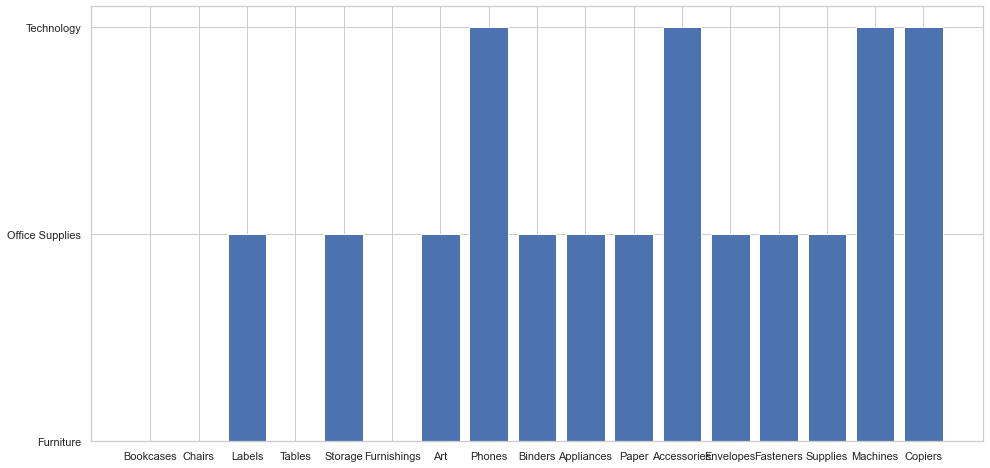

In [51]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df_store)
plt.show()

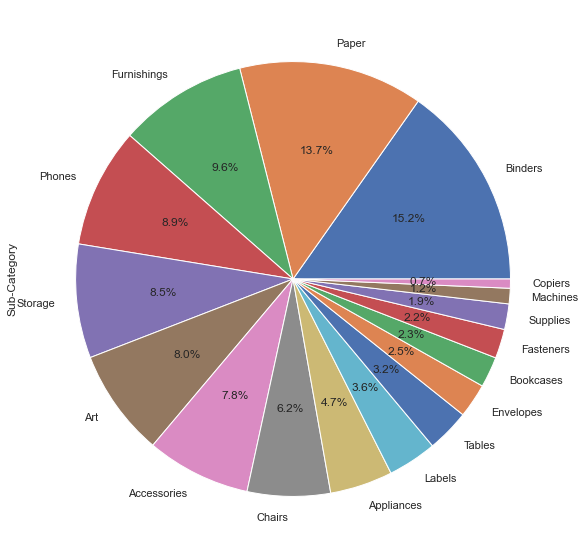

In [54]:
plt.figure(figsize=(12,10))
df_store['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

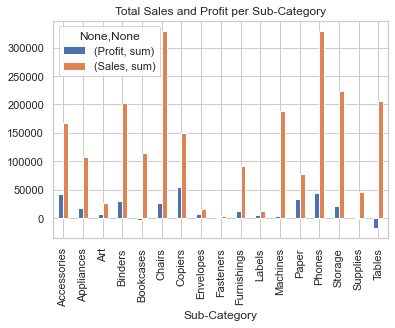

In [58]:
df_store.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Sales and Profit per Sub-Category')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

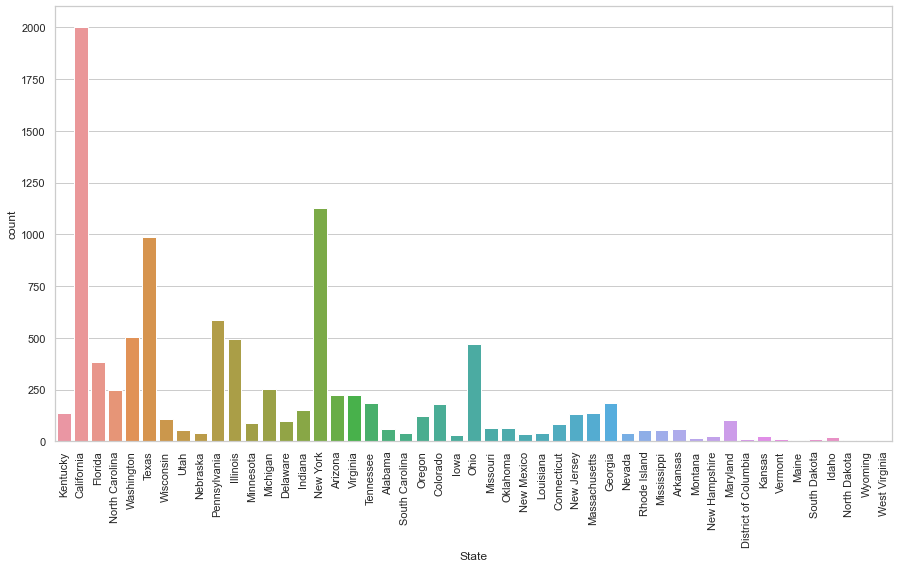

In [60]:
print(df_store['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df_store['State'])
plt.xticks(rotation=90)
plt.show()


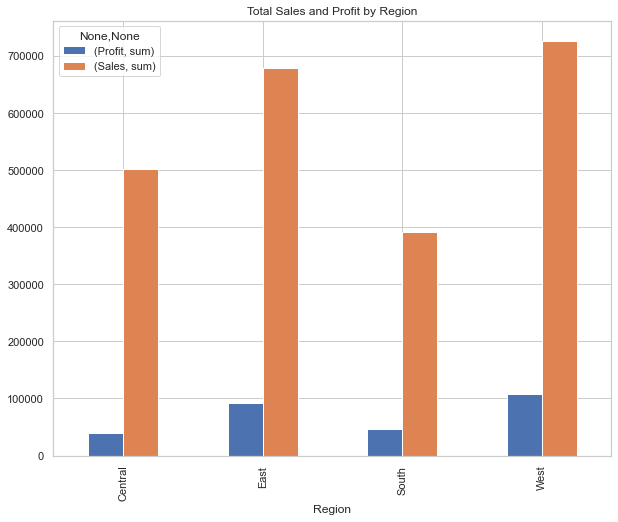

In [63]:
df_store.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Sales and Profit by Region'
)
plt.rcParams['figure.figsize'] = [10,8]
plt.show()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


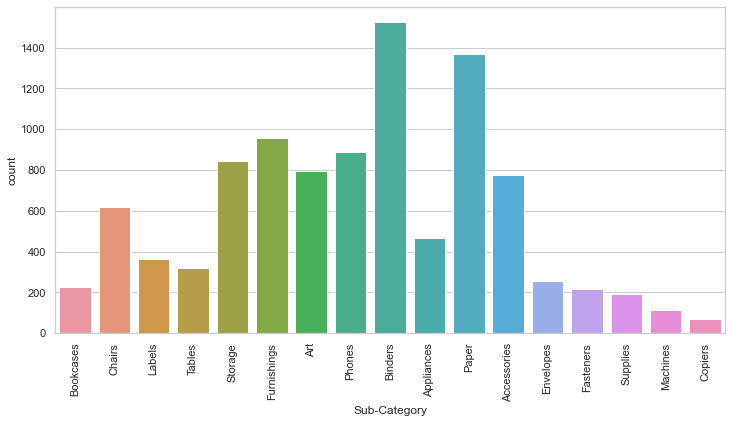

In [64]:
print(df_store['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df_store['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

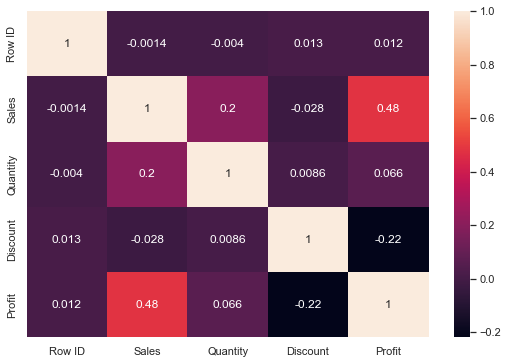

In [65]:
fig,axes =  plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df_store.corr(),annot=True)
plt.show()

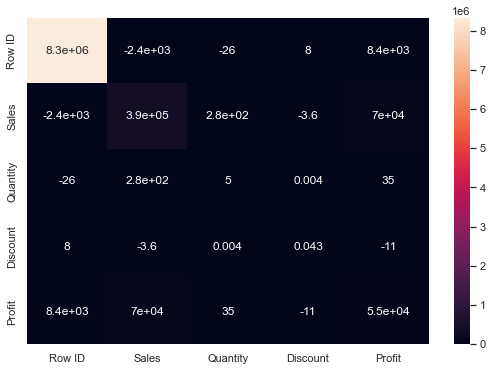

In [66]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df_store.cov(),annot= True)
plt.show()

<AxesSubplot:xlabel='Segment', ylabel='count'>

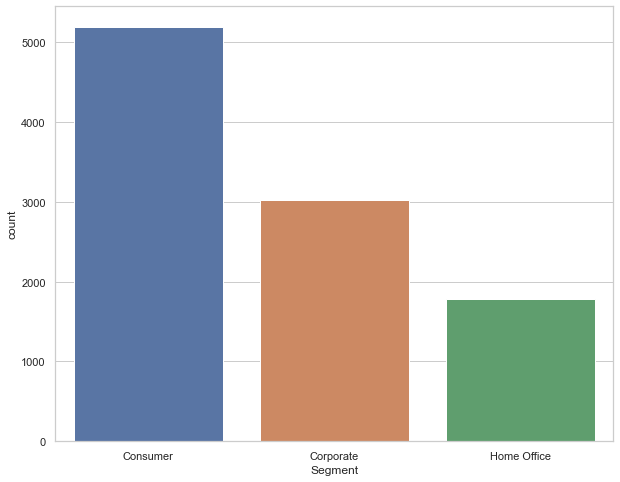

In [67]:
sns.countplot(x=df_store['Segment'])


<AxesSubplot:xlabel='Region', ylabel='count'>

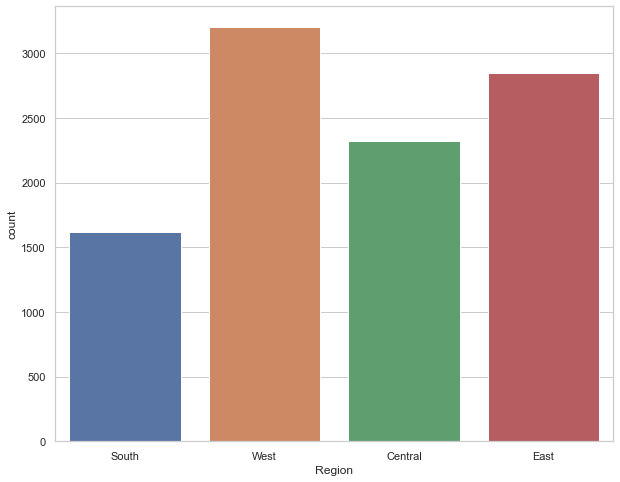

In [68]:
sns.countplot(x=df_store['Region'])


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

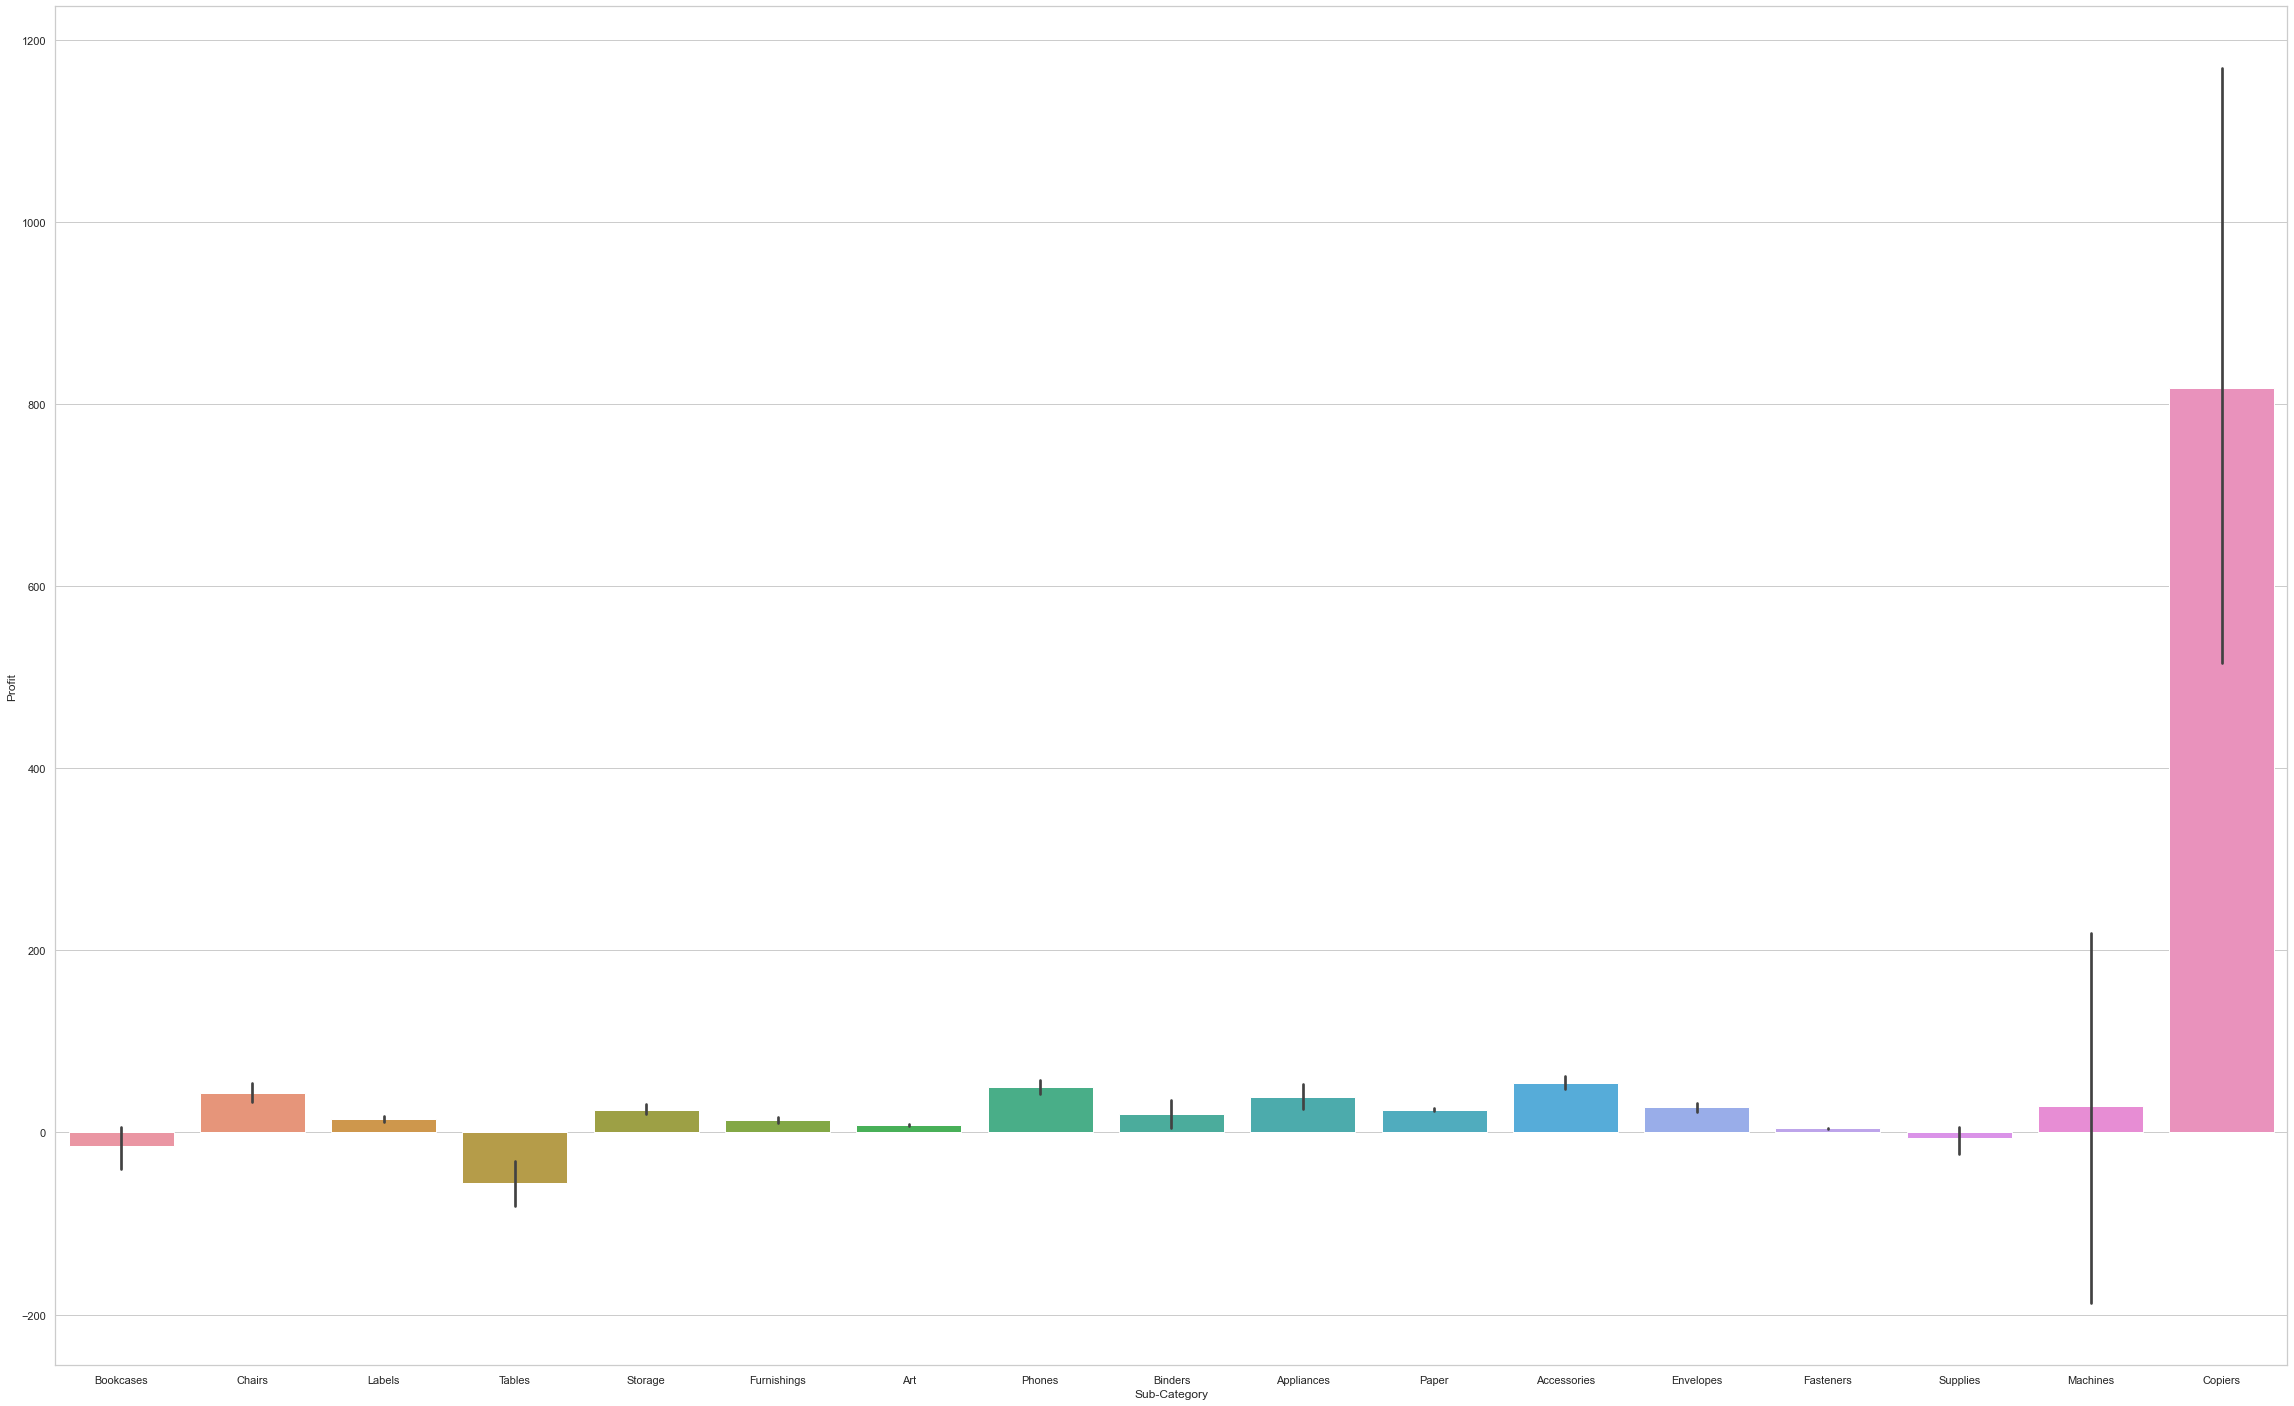

In [69]:
plt.figure(figsize=(40,25))
sns.barplot(x=df_store['Sub-Category'], y=df_store['Profit'])

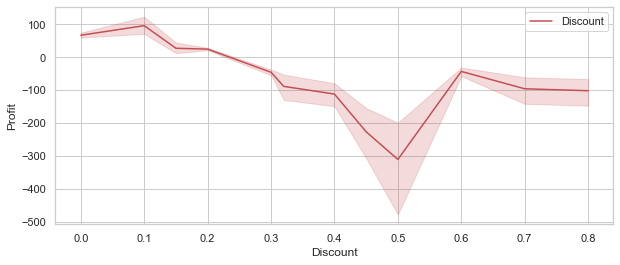

In [70]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit',data = df_store,color='r',label = 'Discount')
plt.legend()

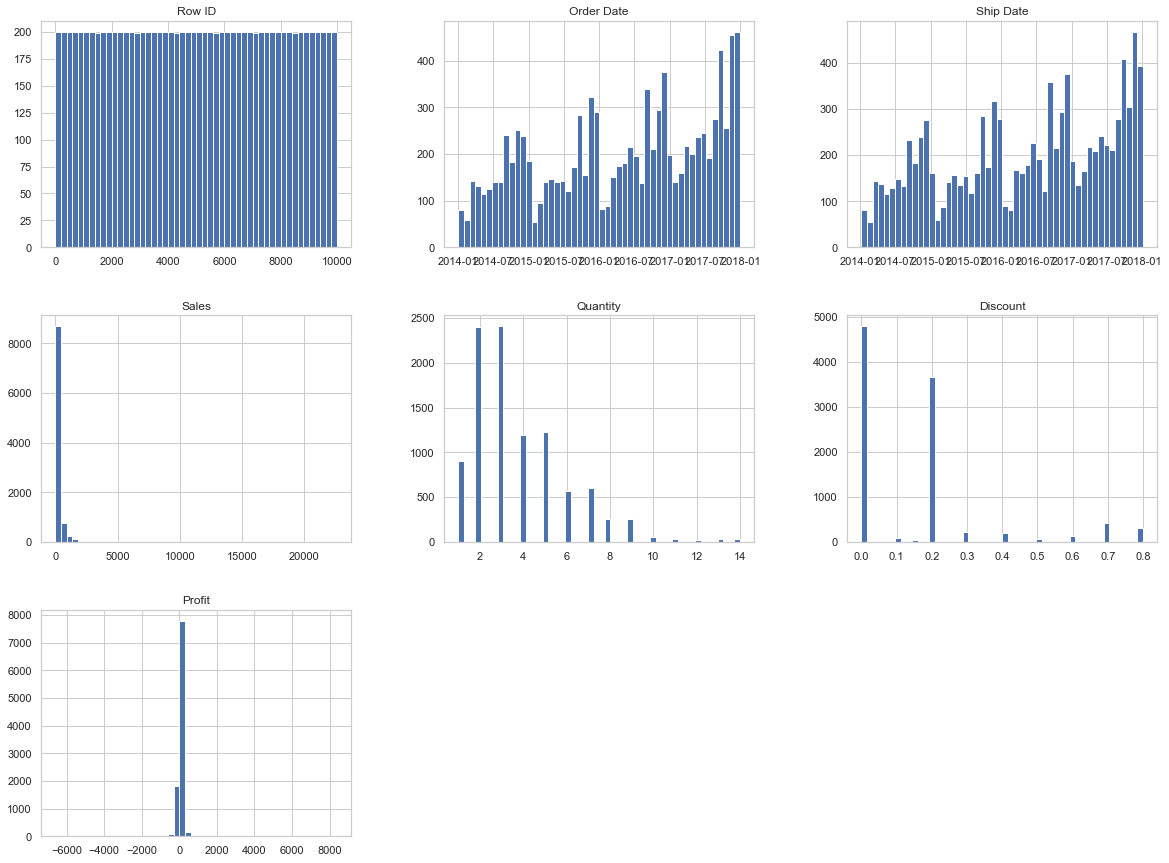

In [71]:
df_store.hist(bins=50,figsize=(20,15))
plt.show()

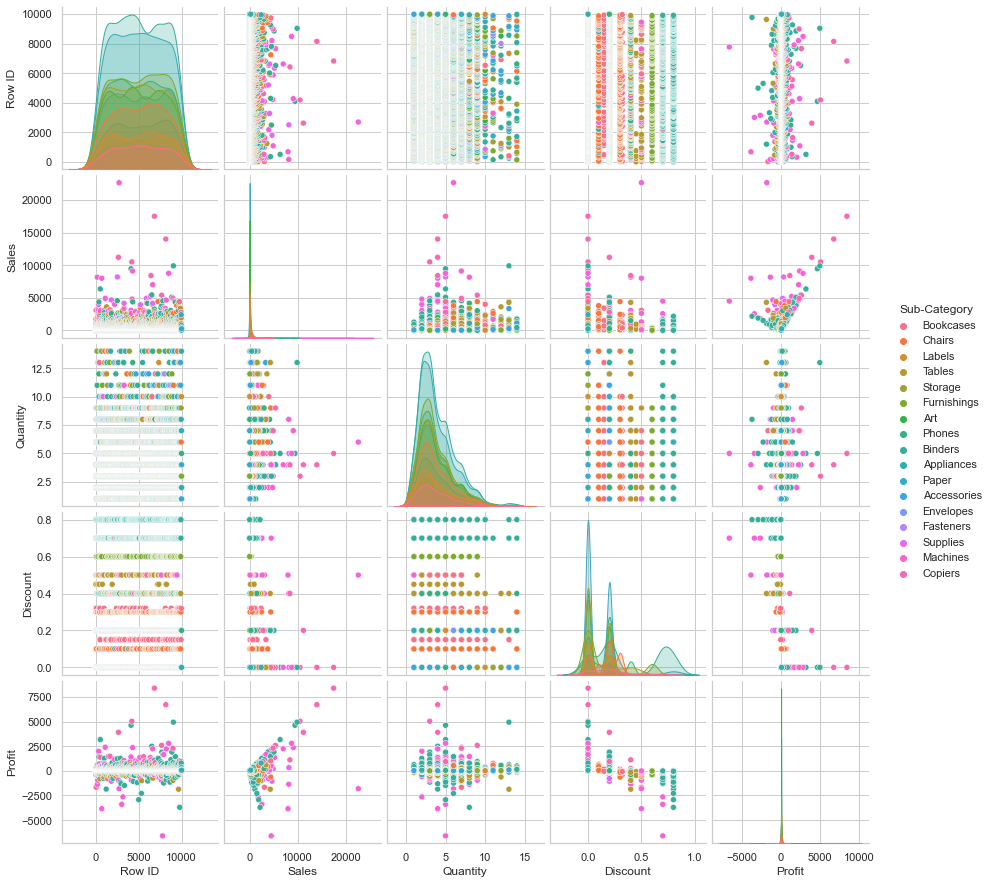

In [72]:
figsize=(15,10)
sns.pairplot(df_store, hue = 'Sub-Category')

In [74]:
grouped = pd.DataFrame(df_store.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
grouped

,Ship Mode,Segment,Category,Sub-Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5,0.70,181.470,-320.5970
1,First Class,Consumer,Furniture,Bookcases,California,West,9,0.45,1809.497,243.2526
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3,0.70,89.991,-152.9847
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5,0.00,354.900,88.7250
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5,0.00,1294.750,336.6350
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,17,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17,1.20,1989.448,63.2645


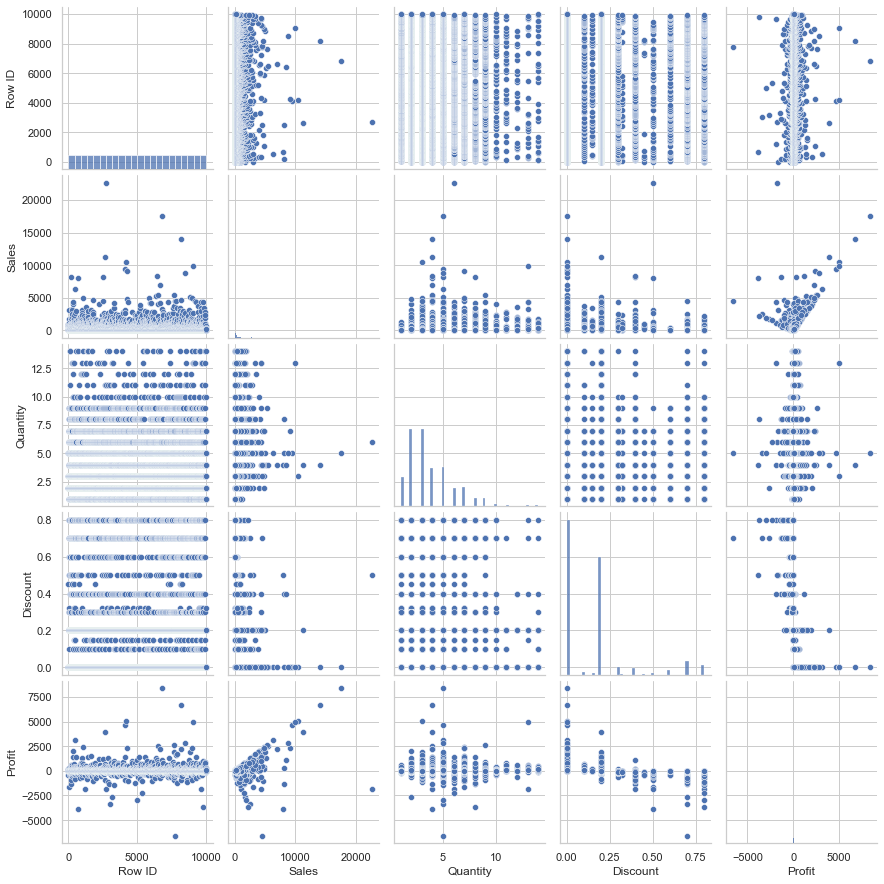

In [75]:
sns.pairplot(df_store)

<AxesSubplot:xlabel='Sales'>

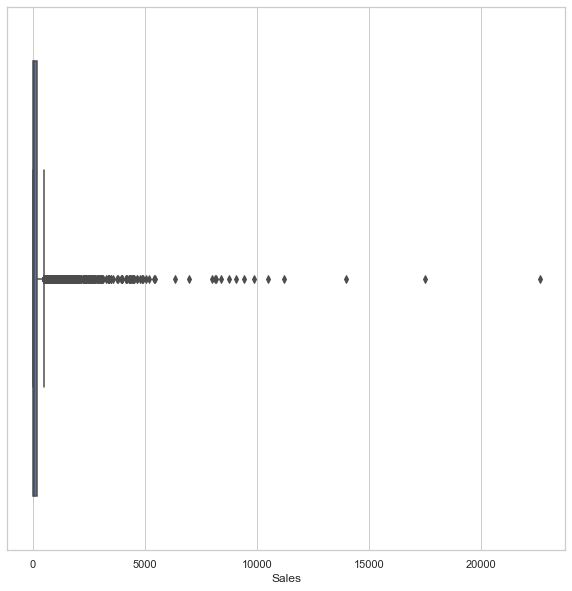

In [76]:
fig, axes = plt.subplots(figsize = (10,10))
sns.boxplot(df_store['Sales'])

<AxesSubplot:xlabel='Discount'>

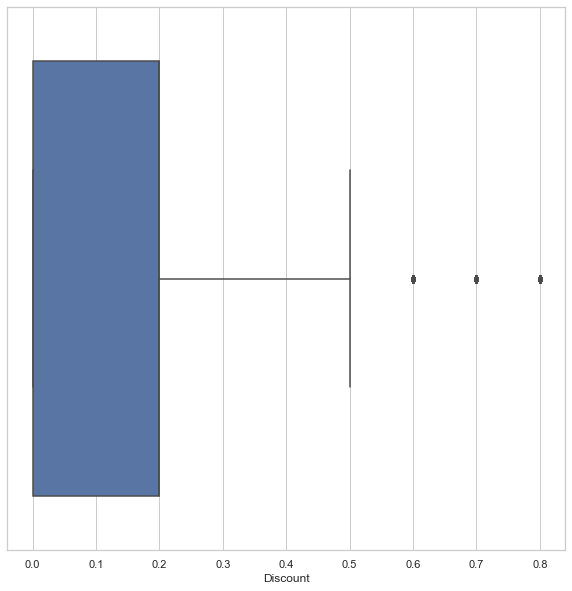

In [77]:
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(df_store['Discount'])

<AxesSubplot:xlabel='Profit'>

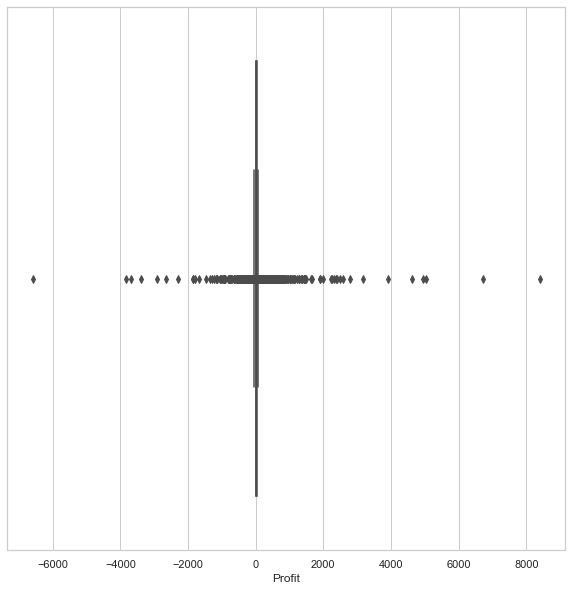

In [78]:
fig,axes =plt.subplots(figsize=(10,10))
sns.boxplot(df_store['Profit']) 

In [80]:
Q1 = df_store.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = df_store.quantile(q=0.75,axis =0, numeric_only= True,interpolation = 'linear')

In [81]:
IQR = Q3-Q1
print(IQR)

Row ID      4996.50000
Sales        192.66000
Quantity       3.00000
Discount       0.20000
Profit        27.63525
dtype: float64


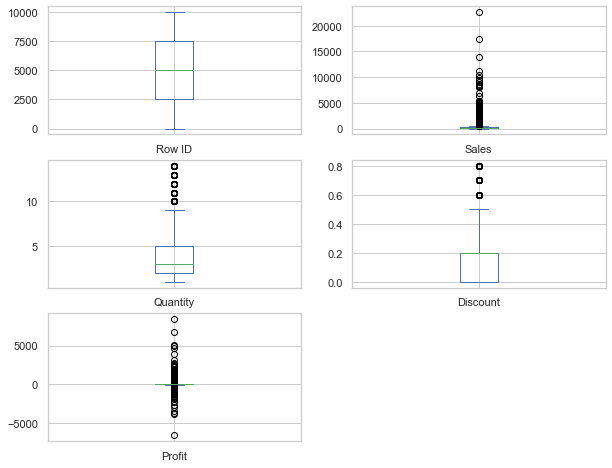

In [83]:
df_store.plot(kind='box',subplots=True,layout=(3,2),sharex =False,sharey = False)
plt.rcParams['figure.figsize'] = [14,12]
plt.show()

In [87]:
# Profit in south & central is less
# Profit in east & west regions is better thaan south and central
# Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products. 
# The store has wide variety of office Supplies especially in Binders and Paper department.
# Negative correlation between profit and discount
# Total sum of profit in sale of tables is negative
# Profit is more in sale of copiers
# No or very less profit in sale of supplies
# Technology segment is more profitable